In [1]:
# Essential Libraries
import os
import sys
import numpy as np
import pandas as pd
import datetime
import random

# Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
sns.set_style("whitegrid");
sns.set_color_codes(palette='pastel');

# Statistics
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

pd.set_option('display.float_format', lambda x: '%.3f' % x);
pd.set_option('display.max_columns', None);
pd.options.display.max_seq_items = 8000;
pd.options.display.max_rows = 8000;

import warnings
warnings.filterwarnings(action="ignore");

PROJECT_ROOT_DIR = "."
DATA_DIR = os.path.join(PROJECT_ROOT_DIR, "data")
IMAGE_DIR = os.path.join(PROJECT_ROOT_DIR, "img")

from IPython.display import Image
for d in [DATA_DIR, IMAGE_DIR]:
    if not os.path.exists(d):
        os.mkdir(d)
        
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGE_DIR, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
# !pip install bokeh

In [3]:
from pprint import pprint

#This is a little recursive helper function converts all nested ndarrays to python list of lists so that pretty printer knows what to do.

def arrayToList(arr):
    if type(arr) == type(np.array):
        #If the passed type is an ndarray then convert it to a list and
        #recursively convert all nested types
        return arrayToList(arr.tolist())
    else:
        #if item isn't an ndarray leave it as is.
        return arr

#suppress exponential notation, define an appropriate float formatter
#specify stdout line width and let pretty print do the work
np.set_printoptions(suppress=True, formatter={'float_kind':'{:16.8f}'.format}, linewidth=120)

# Statistical Distributions

## Random Variables
A random variable is a variable whose possible values are numerical outcomes of a random phenomenon. There are two types of random variables, <b>discrete</b> and <b>continuous</b>.

### DISCRETE Random Variables
A <b>discrete random variable</b> is one which may take on only a <b>countable</b> number of <b>distinct</b> values and thus can be quantified. 
* Example: you can define a random variable X to be the number which comes up when you roll a fair dice. X can take values : <code>[1,2,3,4,5,6]</code> and therefore is a discrete random variable.

### Probability Mass Functions
The probability distribution of a discrete random variable is a list of probabilities associated with each of its possible values. It is also sometimes called the probability function or the probability mass function. To have a mathematical sense, suppose a random variable $\mathbf{X}$ may take $\mathbf{k}$ different values, with the probability that $\mathbf{X} = \mathbf{x}_i$ defined to be $\mathbf{P(\mathbf{X} = \mathbf{x}_i)}=\mathbf{p}_i$. Then the probabilities $\mathbf{p}_i$ must satisfy the following:

$$
\text{1.} 0 < \mathbf{p}_i < 1 \hspace{1cm}- \text{for each i.}\\
\text{2.} \mathbf{p}_1 + \mathbf{p}_2 + ... + \mathbf{p}_k =1.
$$

For outcomes that can be ordered, the probability of an event equal to or less than a given value is defined by the cumulative distribution function, or CDF for short. The inverse of the CDF is called the percentage-point function and will give the discrete outcome that is less than or equal to a probability.

* <b>PMF</b>: Probability Mass Function, returns the probability of a given outcome.
* <b>CDF</b>: Cumulative Distribution Function, returns the probability of a value less than or equal to a given outcome.
* <b>PPF</b>: Percent-Point Function, returns a discrete value that is less than or equal to the given probability.

Remember that in general, for a discrete distribution

\begin{align}
CDF(k) = \sum_{k'=k_\mathrm{min}}^k P(k'),
\end{align}

and for a continuous distribution,

\begin{align}
CDF(x) = \int_{-\infty}^x \mathrm{d}x'\,P(x').
\end{align}

Examples of Discrete Probability Distributions:
* Bernoulli distribution 
* Binomial (Multinomial) distribution 
* Poisson distribution

### CONTINUOUS Random Variables
A <b>continuous random variable</b> is one which takes an infinite number of possible values. For example, you can define a random variable $\mathbf{X} to be the height of students in a class. Since the continuous random variable is defined over an interval of values, it is represented by the area under a curve (or the integral).

### Probability Density Functions
The probability distribution of a continuous random variable, known as probability distribution functions, are the functions that take on continuous values. The probability of observing any single value is equal to 0 since the number of values which may be assumed by the random variable is infinite. For example, a random variable X may take all values over an interval of real numbers. Then the probability that $\mathbf{X}$ is in the set of outcomes $A$, $P(A)$, is defined to be the area above A and under a curve. The curve, which represents a function $\mathbf{p(x)}$, must satisfy the following:

$$
\text{1.} \mathbf{p(x)} > 0 \hspace{1cm}- \text{for all x.}\\
\text{2.} \int_a^b{p(x).dx} = 1 \hspace{1cm}- \text{or the AUC of PDF = 1.}\\
$$

A curve meeting these requirements is known as a <b>density curve</b>.

Examples:
* Normal distribution
* Exponential distribution
* Beta distribution
* Gamma distribution

## <font color = 'green'>Review of Statistical Measures</font>
### Expectation Value:
Let $\mathbf{x}$ be a continuous random variable with range $[a; b]$ and probability density function $f(x)$. The expected value of $\mathbf{x}$ is defined by:

$
\mathbf{E}(\mathbf{x}) = \sum\limits_{i=1}^{m}{\mathbf{p}(\mathbf{x}_i).\mathbf{x}_i} \hspace{2cm}- \text{for Discrete x.}\\
\mathbf{E}(\mathbf{x}) = \int_a^b{x.f(x).dx} \hspace{2cm}- \text{for Continuous x.}
$

### Variance:

Variance($\sigma^2$) is the measure of how far each number from the set of random numbers is from the mean. The square root of the variance is called the standard deviation.

Let $\mathbf{x}$ be a random variable with mean $\mu$.The variance of $\mathbf{x}$ is defined by:

$
Var(\mathbf{x}) = \mathbf{E}{((\mathbf{x} - \mu)^2)} = \sum\limits_{i=1}^{m}{\mathbf{p}(\mathbf{x}_i).{(\mathbf{x}_i} - \mu)^2} = \mathbf{E}{(\mathbf{x}^2)} - \mathbf{E}(\mathbf{x})^2
$

### Standard Deviation:
The standard deviation $\boldsymbol{\sigma}$ of $\mathbf{x}$ is defined by:

$
\boldsymbol{\sigma} = \sqrt{Var(\mathbf{x})} = \sqrt{\sum\limits_{i=1}^{m}{\mathbf{p}(\mathbf{x}_i).{(\mathbf{x}_i} - \mu)^2}}
$

### Covariance:
Covariance is a measure of how much two random variables vary together. Suppose X and Y are random variables with means $\mu_{\mathbf{x}}$ and $\mu_{\mathbf{y}}$ . The covariance of X and Y is defined as:

$
Cov(X,Y) = \mathbf{E}{((X - \mu_{\mathbf{x}})(Y - \mu_{\mathbf{y}}))}
$

Since covariance is defined as an expected value we compute it in the usual way as a sum or integral.

<b>Discrete Case:</b> If X and Y have joint pmf $\mathbf{p}(x_i,y_j)$, then:

$
Cov(X,Y) = \mathbf{E}{((X - \mu_{\mathbf{x}})(Y - \mu_{\mathbf{y}}))} = \sum\limits_{i=1}^{n} \sum\limits_{j=1}^{m}{\mathbf{p}(x_i,y_j).{(x_i - \mu_{\mathbf{x}})(y_j - \mu_{\mathbf{y}})}} = [\sum\limits_{i=1}^{n} \sum\limits_{j=1}^{m}{\mathbf{p}(x_i,y_j).x_i.y_j}] - \mu_{\mathbf{x}}.\mu_{\mathbf{y}}
$

<b>Continuous Case:</b> If X and Y have joint pdf $f(x,y)$, then:

$
Cov(X,Y) = \mathbf{E}{((X - \mu_{\mathbf{x}})(Y - \mu_{\mathbf{y}}))} = \int_a^b \int_c^d{(x - \mu_{\mathbf{x}})(y - \mu_{\mathbf{y}}).f(x,y).dxdy} = [\int_a^b \int_c^d{xy.f(x,y).dxdy}] - \mu_x.\mu_y 
$

### Correlation:
The units of covariance $Cov(X,Y)$ are 'units of X times units of Y'. This makes it hard to compare covariances: if we change scales, then the covariance changes as well. Correlation is a way to remove the scale from the covariance.

 - <b>Definition:</b> 
 The correlation coefficient between X and Y is defined by:
 
 $
 Cor(X,Y) = \rho_{\mathbf{x}\mathbf{y}} = \frac{Cov(X,Y)}{\sigma_{\mathbf{x}}\sigma_{\mathbf{y}}}
 $

## Statistical and Graphical Libraries and Functions

In [4]:
import scipy.stats as st

import bokeh.io
import bokeh.layouts
import bokeh.plotting
from bokeh.plotting import show
from bokeh.io import output_notebook

In [5]:
def plot_pmf(p, x, dist, params, **kwargs):
    """
    Generate plot of PMF at specified values of x.
    """
    y = dist.pmf(x, *params, **kwargs)
    p.circle(x, y, size=7, color='dodgerblue')
    p.segment(x0=x, x1=x, y0=0, y1=y, line_width=3, color='dodgerblue')
    return p


def plot_pdf(p, x, dist, params, **kwargs):
    """
    Generate plot of PDF at specified values of x.
    """
    y = dist.pdf(x, *params, **kwargs)
    p.line(x, y, line_width=1, color='dodgerblue')
    return p


def plot_discrete_cdf(p, x, dist, params, show_segments=False, **kwargs):
    """
    Plot CDF of discrete distribution.
    """
    y = dist.cdf(x, *params, **kwargs)
    if show_segments:
        p.circle(x[:-1], y[:-1], size=7, color='dodgerblue')
        p.segment(x0=x[:-1], x1=x[1:], y0=y[:-1], y1=y[:-1], line_width=3,
                  color='dodgerblue')
    else:
        p.circle(x, y, size=3, color='dodgerblue')
    return p


def plot_continuous_cdf(p, x, dist, params, **kwargs):
    """
    Plot CDF of continuous distribution.
    """
    y = dist.cdf(x, *params, **kwargs)
    p.line(x, y, line_width=3, color='dodgerblue')
    return p


def plot_dists(x, dist, params, param_names, dist_name, **kwargs):
    """
    Plot PDF/PMF and CDF next to each other.
    """
    # Tools for plots
    tools='pan,wheel_zoom,reset'
    
    # Title for plots
    t1 = dist_name + ', ' \
            + ''.join([param_names[i] + ' = ' + str(params[i]) + ', ' 
                                      for i in range(len(params) - 1)])
    t1 += param_names[-1] + ' = ' + str(params[-1])
    
    # Last half of y-axis label
    ylabel = ''.join(pname + ', ' for pname in param_names[:-1])
    ylabel += param_names[-1] + ')'
    
    # Set up plots
    p1 = bokeh.plotting.figure(width=480, height=400, tools=tools, title=t1)
    p2 = bokeh.plotting.figure(width=480, height=400, tools=tools, 
                               y_range=[-0.05, 1.05])

    # Make plots
    if hasattr(dist, 'pmf'):
        p1 = plot_pmf(p1, x, dist, params, **kwargs)
        p1.xaxis.axis_label = 'k'
        p1.yaxis.axis_label = 'P(k; ' + ylabel
        p2 = plot_discrete_cdf(p2, x, dist, params, **kwargs)
        p2.xaxis.axis_label = 'k'
        p2.yaxis.axis_label = 'F(k; ' + ylabel
    else:
        p1 = plot_pdf(p1, x, dist, params, **kwargs)
        p1.xaxis.axis_label = 'x'
        p1.yaxis.axis_label = 'P(x; ' + ylabel
        p2.yaxis.axis_label = 'F(x; ' + ylabel
        p2 = plot_continuous_cdf(p2, x, dist, params, **kwargs)
        p2.xaxis.axis_label = 'x'
        p2.yaxis.axis_label = 'F(k; ' + ylabel
        
    # Link the x-axes
    p1.x_range = p2.x_range

    return bokeh.layouts.row([p1, p2])

## Bernoulli Distribution
The Bernoulli distribution is a discrete probability distribution that covers a case where an event will have a binary outcome as either a 0 or 1.

* x in {0, 1}

A “Bernoulli trial” is an experiment or case where the outcome follows a Bernoulli distribution. The distribution and the trial are named after the Swiss mathematician Jacob Bernoulli.

Some common examples of Bernoulli trials include:

* The single flip of a coin that may have a heads (0) or a tails (1) outcome.
* A single birth of either a boy (0) or a girl (1).

A common example of a Bernoulli trial in machine learning might be a binary classification of a single example as the first class (0) or the second class (1).

The distribution can be summarized by a single variable p that defines the probability of an outcome 1. Given this parameter, the probability for each event can be calculated as follows:

P(x=1) = p
P(x=0) = 1 – p

If $\mathbf{X}$ is a random variable with this distribution, then:

Pr(x=1) = p = 1 - Pr(x=0) = 1 - q.

The probability mass function $f$ of this distribution, over possible outcomes k, is:

$
f(k; p) =
  \begin{cases}
    p & \text{if k = 1} \\
    q = 1-p & \text{if k = 0}
  \end{cases}
$

This can also be expressed as:

$
f(k; p) =p^{k}(1 - p)^{(1 - k)} \hspace{1cm} \forall k \in [0, 1]
$


In the case of flipping a fair coin, the value of p would be 0.5, giving a 50% probability of each outcome.

### Summary Statistics

\begin{align}
\text{Mean} &= \langle x \rangle &= \mathbf{E}(x) &= \sum_i x_i*P(x_i) = \mathbf{p}
\end{align}

\begin{align}
\text{Variance} &= \left\langle x^2 \right\rangle - \langle x \rangle^2
= \left\langle(x - \langle x \rangle)^2 \right\rangle = \sum\limits_{i=1}^{m}{\mathbf{p}(\mathbf{x}_i).{(\mathbf{x}_i} - \mu)^2}  = \mathbf{p}(1-\mathbf{p})
\end{align}

In [6]:
output_notebook()

Loading BokehJS ...

In [7]:
k = np.array([0, 1])
p = plot_dists(k, st.bernoulli, (0.4,), ('p',), 'Bernoulli')
show(p)

### Bernoulli Trial
A “Bernoulli trial” is an experiment or case where the outcome follows a Bernoulli distribution. The distribution and the trial are named after the Swiss mathematician Jacob Bernoulli.

## Binomial Distribution


The repetition of multiple independent Bernoulli trials is called a Bernoulli process.

The outcomes of a Bernoulli process will follow a Binomial distribution. As such, the Bernoulli distribution would be a Binomial distribution with a single trial.

Some common examples of Bernoulli processes include:

* A sequence of independent coin flips.
* A sequence of independent credit card transactions (normal or fradulent).

The performance of a machine learning algorithm on a binary classification problem can be analyzed as a Bernoulli process, where the prediction by the model on an example from a test set is a Bernoulli trial (correct or incorrect).

The Binomial distribution summarizes the number of successes in a given number of Bernoulli trials k, with a given probability of success for each trial p.

**Parameters.** There are two parameters: the probability $p$
of success for each Bernoulli trial, and the number of trials, $n$.

**Example.** Distribution of plasmids between daughter cells
in cell division.  Each of the $n$ plasmids as a chance $p$ of being
in daughter cell 1 ("success").  The number of plasmids, $k$, in
daughter cell 1 is binomially distributed.

**Probability mass function.**

\begin{align}
P(k;n,p) = \begin{pmatrix}
n \\
k
\end{pmatrix}
p^k (1-p)^{n-k}.
\end{align}

### Summary Statistics

\begin{align}
\text{Mean} &= \langle x \rangle &= \mathbf{E}(x) &= \sum_i x_i*P(x_i) = \mathbf{n.p}
\end{align}

\begin{align}
\text{Variance} &= \left\langle x^2 \right\rangle - \langle x \rangle^2
= \left\langle(x - \langle x \rangle)^2 \right\rangle = \sum\limits_{i=1}^{m}{\mathbf{p}(\mathbf{x}_i).{(\mathbf{x}_i} - \mu)^2}  = \mathbf{n.p}(1-\mathbf{p}) = \mathbf{npq}
\end{align}

We can demonstrate this with a Bernoulli process where the probability of success is 40% or P(x=1) = 0.4 and the total number of trials is 20 (k=20).

We can simulate the Bernoulli process with randomly generated cases and count the number of successes over the given number of trials. This can be achieved via the <code>binomial()</code> NumPy function. This function takes the total number of trials and probability of success as arguments and returns the number of successful outcomes across the trials for one simulation.

In [8]:
k = np.arange(21)
p = plot_dists(k, st.binom, (20, 0.4), ('n', 'p',), 'Binomial')
show(p)

## Problems in Binomial Distribution

### Prob 1. Coin Toss
You flip a fair coin 10 times.
1. Construct the probability mass function.
2. What is the probability of getting exactly 4 heads?
3. What is the probability of getting atleast 6 heads?
4. What is the probability of getting atmost 6 heads?

In [9]:
p = 0.5
n = 10
k = np.arange(11)
binomial = st.binom.pmf(k,n,p)
cumbinomial = st.binom.cdf(k,n,p)

In [10]:
binomial

array([      0.00097656,       0.00976563,       0.04394531,       0.11718750,       0.20507813,       0.24609375,
             0.20507813,       0.11718750,       0.04394531,       0.00976563,       0.00097656])

In [11]:
cumbinomial

array([      0.00097656,       0.01074219,       0.05468750,       0.17187500,       0.37695313,       0.62304687,
             0.82812500,       0.94531250,       0.98925781,       0.99902344,       1.00000000])

In [12]:
dist = plot_dists(k, st.binom, (10, 0.5), ('n', 'p',), 'Binomial')
show(dist)

In [13]:
import math
# Exactly 4 Heads
# Use the Binomial Distribution formula
# 10C4*(0.5)^4*(0.5)^(10-4)
math.factorial(10)/((math.factorial(4))*(math.factorial(6)))*((0.5)**4)*((0.5)**(10-4))

0.205078125

In [14]:
# Or use the PMF
binomial[4]

0.20507812500000022

In [15]:
# Probability of getting atleast 6 Heads
# P(x >= 6) = P(6) + P(7) + P(8) + P(9) + P(10) = 1 - CDF(5) = 1 - cumbinomial(5)
1 - cumbinomial[5]

0.3769531250000001

In [16]:
# Probability of getting atmost 6 Heads
cumbinomial[6]

0.828125

### Prob 2. Call Centre
In a call centre with 200 agents, each agent is assigned 50 calls a day. If the average successful conversion ratio in a call is 4%, and each successful conversion is worth a sell of 100 units, what is the mean and standard deviation of the sell in that call centre per day, assuming each agent are independent and calls with equal efficiency?

In [17]:
k = np.arange(51)
dist = plot_dists(k, st.binom, (50, 0.04), ('n', 'p',), 'Binomial')
show(dist)

We can form new distributions by combining random variables. If we know the mean and standard deviation of the original distributions, we can use that information to find the mean and standard deviation of the resulting distribution.
We can combine means directly, but we can't do this with standard deviations. We can combine variances as long as it's reasonable to assume that the variables are independent.


In [18]:
# Average successful calls per agent = E(p) = n.p
# Total successful calls = 200.n.p
200*50*0.04

400.0

In [19]:
# Variance per agent = n.p.(1-p)
# Total variance across all agents = 200.n.p.(1 - p)
200*50*0.04*(1 - 0.04)

384.0

In [20]:
# Standard Deviation across all agents
np.sqrt(384)

19.595917942265423

In [21]:
# Average business per day = 400*100 units
400*100

40000

In [22]:
# Standard Deviation in business per day
19.5959*100

1959.5900000000001

## Poisson distribution

Rare events occur with a rate $\lambda$ per unit
time.  There is no "memory" of previous events; i.e., that rate is
independent of time. A process that generates such events is called a *Poisson process*. The occurrence of a rare event in this context is referred to as an *arrival*. The number $k$ of arrivals in unit time is Poisson distributed.

**Parameter.** The single parameter is the rate $\lambda$ of
the rare events occurring.

**Examples** 
* The number of mutations in a strand of DNA per unit length (since mutations are rare) are Poisson distributed.
* The number of emergency patients arriving in a hospital between 10 and 11 AM.

**Probability mass function**
\begin{align}
P(k;\lambda) = \frac{\lambda^k}{k!}\,\mathrm{e}^{-\lambda}.
\end{align}

**Notes.**
The Poisson distribution is a limit of the binomial distribution in
which the number of trials goes to infinity, but the expected number
of successes, $np$, stays fixed.  Thus,

\begin{align}
P_\mathrm{Poisson}(k;\lambda) \approx P_\mathrm{Binomial}(k;n, p),
\end{align}

with $\lambda = np$.  Considering the biological example of mutations,
this is binomially distributed: There are $n$ bases, each with a
probability $p$ of mutation, so the number of mutations, $k$ is
binomially distributed.  Since $p$ is small, it is approximately
Poisson distributed.

### Summary Statistics

\begin{align}
\text{Mean} &= \langle x \rangle &= \mathbf{E}(x) &= \sum_i x_i*P(x_i) = \lambda
\end{align}

\begin{align}
\text{Variance} &= \left\langle x^2 \right\rangle - \langle x \rangle^2
= \left\langle(x - \langle x \rangle)^2 \right\rangle = \sum\limits_{i=1}^{m}{\mathbf{p}(\mathbf{x}_i).{(\mathbf{x}_i} - \mu)^2}  = \mathbf{n.p}(1-\mathbf{p}) = \lambda
\end{align}

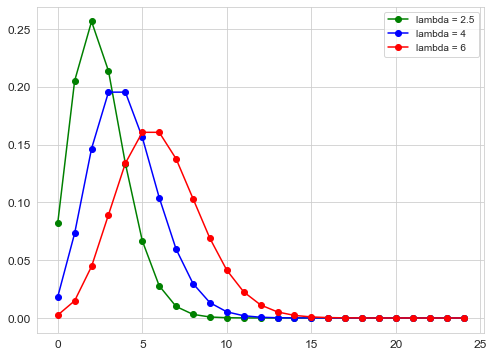

In [23]:
k = np.arange(25)
a = st.poisson.pmf(k,2.5)
b = st.poisson.pmf(k, 4)
c = st.poisson.pmf(k, 6)

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(k, a, color='green', marker='o', label='lambda = 2.5')
plt.plot(k, b, color='blue', marker = 'o', label='lambda = 4')
plt.plot(k, c, color = 'red', marker = 'o', label='lambda = 6')
plt.legend()

In [24]:
k = np.arange(21)
p = plot_dists(k, st.poisson, (4,), ('λ',), 'Poisson')
show(p)

## Problems on Poisson Distribution

### Prob 1. Work related injuries in a Manufacturing Plant
The number of work related injuries per month in a manufacturing plant is known to follow a Poisson distribution, with a mean of 2.5 work-related injuries a month.
* What is the probability that in a given month, no work-related injuries occur?
* What is the probability that at least one work- related injury occurs?

Here, $\lambda$ = 2.5.

In [25]:
# Probability of No injury in a month = P(x = 0)
# From Distribution formula, P(x = 0) = e^(-2.5) * (2.5)^0 / 0!
np.exp(-2.5)

0.0820849986238988

In [26]:
# Probability of at least one injury in a month = P(x >= 1) = 1 - P(0)
1-np.exp(-2.5)

0.9179150013761012

### Prob 2. Views of an online blog post
Every week, on average, 17 people view my blog post. I’d like to predict the number of people who would view next week because I get paid weekly by those numbers. What is the probability that exactly 20 people (or 10, 30, 50, etc.) will clap for the blog post next week?

Source: [KDNuggets](https://www.kdnuggets.com/2019/08/poisson-distribution.html)

Here, $\lambda$ = 17.

In [27]:
# Probability of 20 views next week = P(x = 20)
# From Distribution formula, P(x = 20) = e^(-17) * (17)^k / k!
(np.exp(-17))*(17**20)/(math.factorial(20))

0.06915882695522836

## Continuous Distributions
## Normal Distribution

Any quantity that emerges from a large number of
subprocesses tends to be Gaussian distributed provided none of the
subprocesses is very broadly distributed.

**Parameters.** The Gaussian distribution has two parameters,
the mean $\mu$, which determines the location of its peak, and the
standard deviation $\sigma$, which is strictly positive (the
$\sigma\to 0$ limit defines a Dirac delta function) and determines the
width of the peak.

**Example.** We measure the heights of all males attending a festival. The heights are normally distributed.

**Probability density function**

\begin{align}
P(x;\mu, \sigma) = \frac{1}{\sqrt{2\pi \sigma^2}}\,\mathrm{e}^{-(x-\mu)^2/2\sigma^2}.
\end{align}

**Notes.** This is a limiting distribution in the sense of the
central limit theorem, but also in that many distributions have a
Gaussian distribution as a limit.  This is seen by formally taking
limits of, e.g., the Gamma, Student-t, Binomial distributions, which
allows direct comparison of parameters.

### Summary Statistics

\begin{align}
\text{Mean} &= \langle x \rangle &= \mathbf{E}(x) &= \int_{-\infty}^\infty{x.\mathbf{P}(x).dx} = \mu
\end{align}

\begin{align}
\text{Variance} &= \left\langle x^2 \right\rangle - \langle x \rangle^2
= \left\langle(x - \langle x \rangle)^2 \right\rangle = \int_{-\infty}^\infty{\mathbf{P}(\mathbf{x}).{(\mathbf{x}} - \mu)^2}.dx  = \sigma^{2}
\end{align}

In [28]:
x = np.linspace(0, 20, 200)
p = plot_dists(x, st.norm, (10, 2), ('µ', 'σ'), 'Gaussian')
show(p)

## Problems on Normal Distribution
### Prob 1. Distribution of vehicle speed on a highway
A radar unit is used to measure speeds of cars on a Mumbai – Pune Highway. The speeds are normally distributed with a mean of 70 km/hr and a standard deviation of 10 km/hr.

* What is the probability that a car picked at random is travelling at more than 100 km/hr?

* What is the probability that the car speed is between 80 Km / hr and 100 Km / hr?

Here, $\mathbf{\mu} = 70, \mathbf{\sigma} = 10$.

$
z = (x - \mu)/\sigma
$

In [29]:
# Soln (a): Probability of a car is travelling at >= 100kmph = 1 - CDF(z = (100 - 70)/10)
z = (100 - 70)/10
1 - (st.norm.cdf(z))

0.0013498980316301035

In [30]:
# Soln (b): probability that the car speed is between 80 Km / hr and 100 Km / hr = CDF(speed = 100) - CDF(speed = 80)
z1 = (80-70)/10
st.norm.cdf(z) - st.norm.cdf(z1)

0.15730535589982697

### Prob 2. Distribution of resistances in Electrical manufacturing
#### Given:
At a facility that manufactures electrical resistors, a statistical sample of 1-kΩ resistors is pulled from the production line. The resistor's resistances are measured and recorded. A mean resistance of 979.8 kΩ and a standard deviation of 73.10 kΩ represents the sample of resistors. The desired resistance tolerance for the 1-kΩ resistors is ± 10%. This tolerance range means the acceptable range of resistance is 900 Ω to 1100 Ω.
#### Find:
Assuming a normal distribution, determine the probability that a resistor coming off the production line will be within spec (in the range of 900 Ω to 1100 Ω).

### Solution
The Python script we are going to build to solve the resistor problem above needs to accomplish a couple of things:

1. Import the necessary functions. We need to use the erf() and sqrt() functions in Python's math module.
2. Define the constants for this problem. The mean, standard deviation, lower bound and upper bound will be defined.
3. Calculate the probability using the erf() function from Python's math() module.
4. Print the results to the Python interpreter

In [31]:
from math import erf, sqrt

mu = 979.8    # mean = 978.8 kΩ
sigma = 73.1  # standard deviation = 73.1 kΩ
x1 = 900      # lower bound = 900 kΩ
x2 = 1100     # upper bound = 1100 kΩ

Next, we calculate the Z-transform of the upper and lower bounds using the mean and standard deviation. Then we use the erf() function to calculate the probability from Z = 0 to the Z-transform derived from the upper and lower bounds.

In [32]:
# calculate probability

# probability from Z=0 to lower bound
double_prob = erf( (x1-mu) / (sigma*sqrt(2)) )
p_lower = double_prob/2
print(f'\n Lower Bound: {round(p_lower,4)}')

# probability from Z=0 to upper bound
double_prob = erf( (x2-mu) / (sigma*sqrt(2)) )
p_upper = double_prob/2
print(f'\n Upper Bound: {round(p_upper,4)}')


 Lower Bound: -0.3625

 Upper Bound: 0.4499


From the Z-transform of the upper and lower limits, we calculated two probabilities: p_lower and p_upper. We can use these probabilities to calculate the likelihood a resistor randomly pulled off the line is within tolerance (inside the range of 900 kΩ to 1100 kΩ) or out of tolerance (outside the range of 900 kΩ to 1100 kΩ).

In [33]:
# print the results

Pin = (p_upper) - (p_lower)
print('\n')
print(f'mean = {mu}    std dev = {sigma} \n')
print(f'Calculating the probability of occurring between {x1} <--> {x2} \n')
print(f'inside interval P(in) = {round(Pin*100,1)}%')
print(f'outside interval P(out) = {round((1-Pin)*100,1)}% \n')
print(f'The probability a resistor coming off the production line is within spec is the probability of the inside interval is {round(Pin*100,1)}%.')



mean = 979.8    std dev = 73.1 

Calculating the probability of occurring between 900 <--> 1100 

inside interval P(in) = 81.2%
outside interval P(out) = 18.8% 

The probability a resistor coming off the production line is within spec is the probability of the inside interval is 81.2%.
